In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

In [64]:
# Load the dataset
data = pd.read_csv('netflix1.csv')

In [65]:
#To get an overview of the data
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [66]:
# Checking how many missing values are in each column
data.isnull().sum()


show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [67]:
# Remove duplicate rows if any
data.drop_duplicates(inplace=True)



<Figure size 1200x600 with 0 Axes>

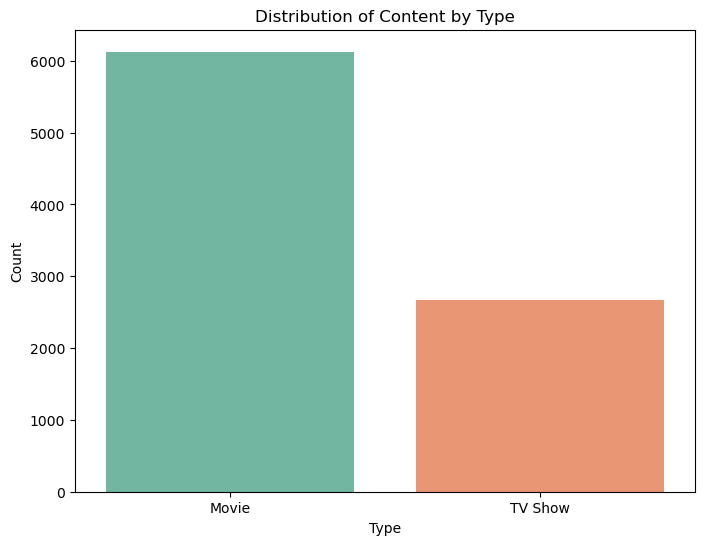

In [68]:
# Convert the counts to a DataFrame for Seaborn
type_counts = data['type'].value_counts()
type_df = type_counts.reset_index()
type_df.columns = ['type', 'count']

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(data=type_df, x='type', y='count', hue='type', palette='Set2', legend=False)
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


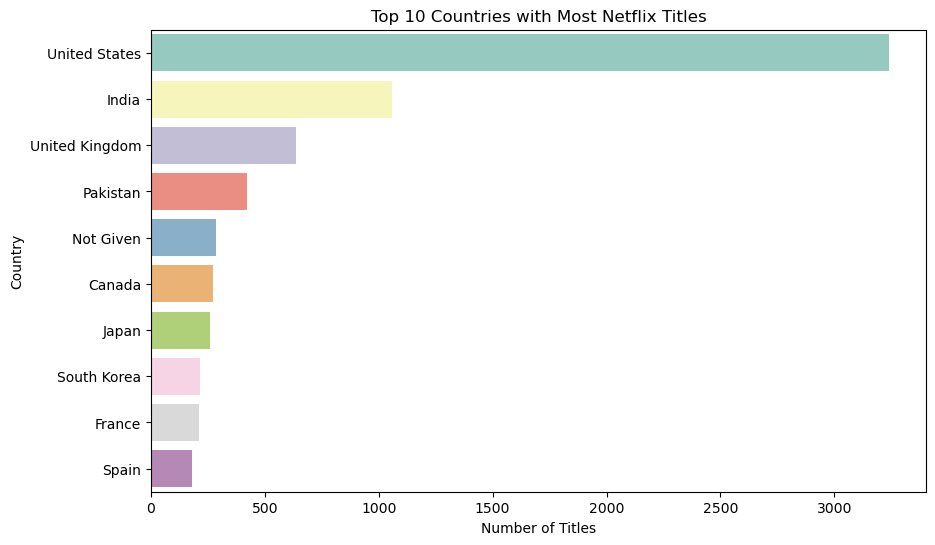

In [69]:
# Top 10 Countries
top_countries = data['country'].value_counts().head(10).reset_index()
top_countries.columns = ['Country', 'Count']

plt.figure(figsize=(10,6))
sns.barplot(data=top_countries, y='Country', x='Count', hue='Country', palette='Set3', legend=False)
plt.title('Top 10 Countries with Most Netflix Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


In [70]:
# Create the genres column by splitting listed_in
data['genres'] = data['listed_in'].apply(lambda x: x.split(', '))


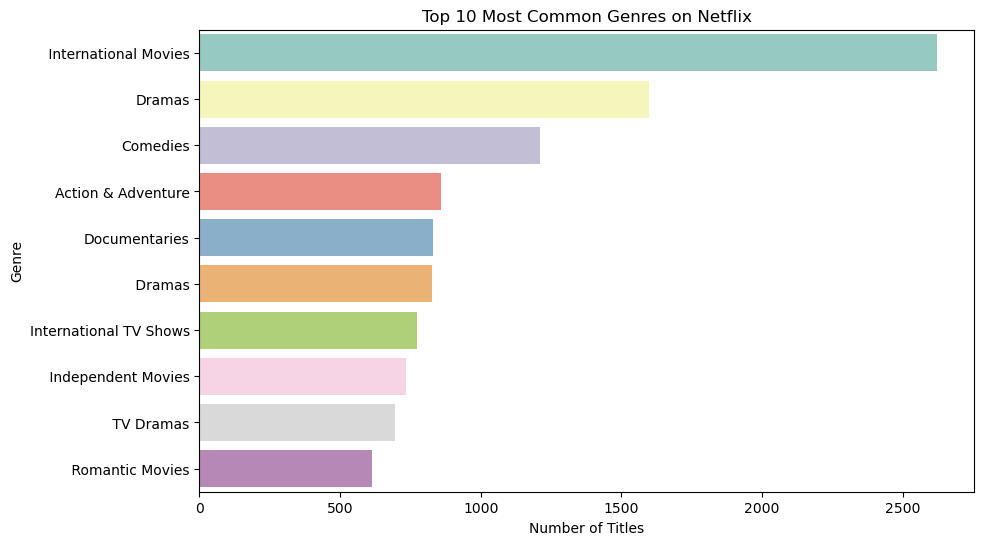

In [71]:
# Splitting 'listed_in' column to analyze genres
data['genres'] = data['listed_in'].apply(lambda x: x.split(','))

# Flatten genres
all_genres = sum(data['genres'], [])

# Count and reset index
genre_counts = pd.Series(all_genres).value_counts().head(10).reset_index()
genre_counts.columns = ['Genre', 'Count']

# Now: set hue=Genre and legend=False
plt.figure(figsize=(10,6))
sns.barplot(data=genre_counts, y='Genre', x='Count', palette='Set3', hue='Genre', legend=False)
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()




In [72]:
# Force conversion of 'date_added' to datetime
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')


In [73]:
# Extract year from date_added
data['year_added'] = data['date_added'].dt.year


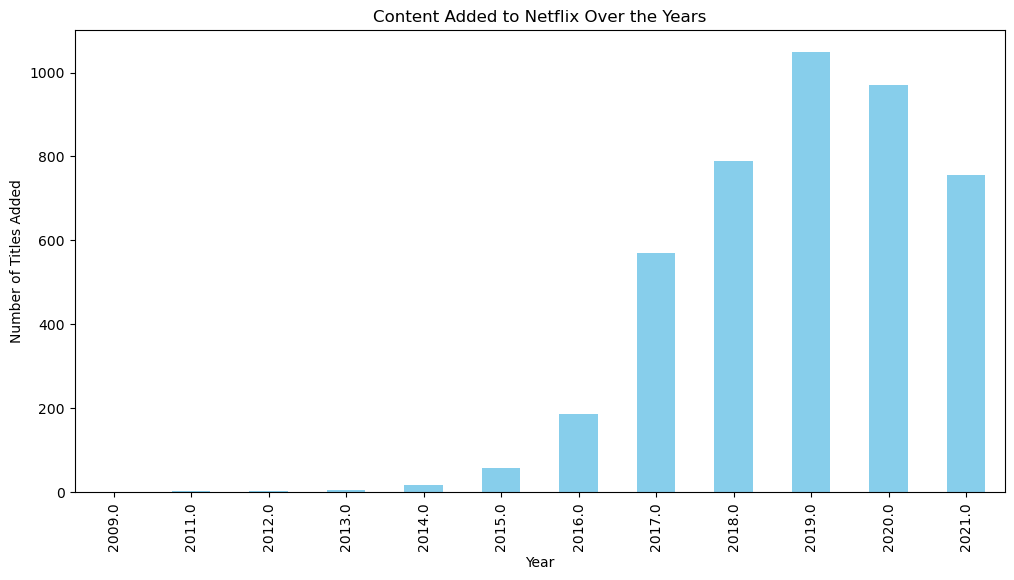

In [94]:
# Create 'year_added' column 
data['year_added'] = data['date_added'].dt.year

# Group content by year
content_added_per_year = data['year_added'].value_counts().sort_index()

# Plot content added per year
plt.figure(figsize=(12, 6))
content_added_per_year.plot(kind='bar', color='skyblue')
plt.title('Content Added to Netflix Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.show()


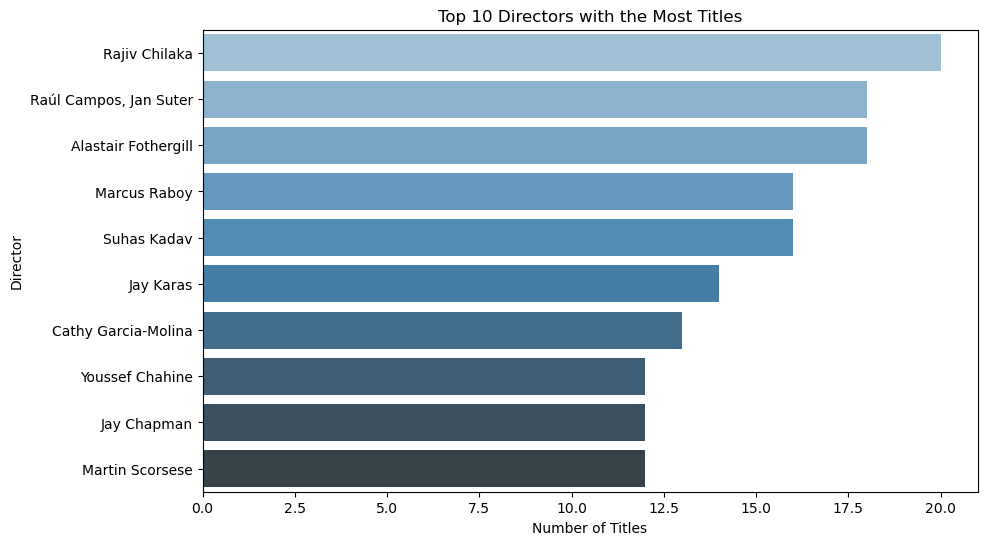

In [13]:
# Filter out 'Not Given' directors
filtered_directors = data[data['director'] != 'Not Given']

# Count top 10 directors
top_directors = filtered_directors['director'].value_counts().head(10)

# Convert top directors data into a DataFrame
directors_df = top_directors.reset_index()
directors_df.columns = ['director', 'count']

# Plot without warning
plt.figure(figsize=(10, 6))
sns.barplot(data=directors_df, x='count', y='director', hue='director', palette='Blues_d', legend=False)
plt.title('Top 10 Directors with the Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()


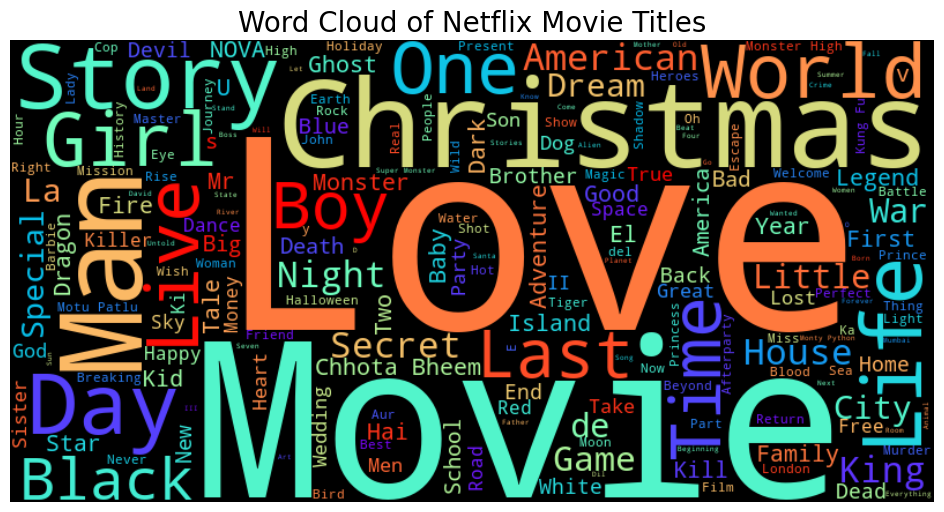

In [76]:
# Importing WordCloud 
from wordcloud import WordCloud

# Filtering only Movie Titles
movie_titles = data[data['type'] == 'Movie']['title']

# Combining all movie titles into a single string
text = ' '.join(movie_titles)

# Generating the Word Cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='rainbow',    # You can change to 'viridis', 'plasma', etc.
    max_words=200          # Limit maximum words if needed
).generate(text)

# Plotting the Word Cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hides axis
plt.title('Word Cloud of Netflix Movie Titles', fontsize=20)
plt.show()



Conclusion and Insights

- Netflix has a larger collection of Movies compared to TV Shows, with Movies dominating the content type distribution.
- The United States, India, and the United Kingdom are the top three countries contributing the most titles to Netflix's catalog.
- The majority of Netflix's content falls under the genres of International Movies, Dramas, and Comedies.
- Netflix experienced a major surge in content addition after 2016, showing aggressive expansion in its library.
- Directors like Rajiv Chilaka, Raúl Campos, Jan Suter, and Alastair Fothergill have contributed significantly to Netflix's content portfolio.
- The Word Cloud analysis of movie titles shows recurring themes such as "Love", "Life", "Story", and "World", reflecting common narratives explored in Netflix's films.

This analysis provided valuable insights into Netflix’s content trends, popular genres, influential directors, and global content sourcing strategies.
